In [1]:
#Note: Write script in Python 2 for this assignment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1. UserSim

In [3]:
def UserSim(n, my_lambda):
    sim = list(np.random.exponential(1/float(my_lambda), n)) 
    return sim

In [4]:
np.random.seed(123)
my_sim = UserSim(1000, 2)
my_cum = np.cumsum(my_sim)

In [5]:
max(my_sim)

3.4146596874389639

In [6]:
x = [0.25,0.5,0.75,1,
     1.25,1.5,1.75,2,2.25,2.5,2.75,3]

In [7]:
y = []
for i in x:
    num = np.sum(np.array(my_sim) >= i)
    y.append(num)

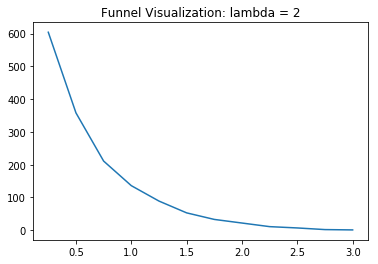

In [8]:
plt.plot(x,y)
plt.title('Funnel Visualization: lambda = 2')
plt.show()

In [9]:
lambdas = list(np.round(np.arange(0.2,3.2,0.2),2))

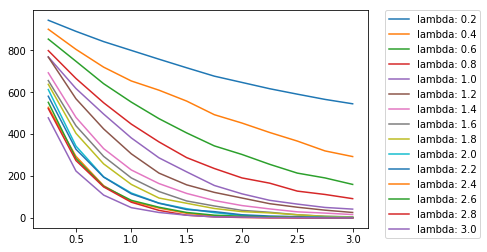

In [10]:
for l in lambdas:
    my_sim = UserSim(1000,l)
    y = []
    for i in x:
        num = np.sum(np.array(my_sim) >= i)
        y.append(num)
    plt.plot(x,y, label = 'lambda: {}'.format(l))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Survival time is the time a user stayed survive. 

- The bigger the $\lambda$ is, the steeper the slope is and the lower the line is in the gragh, which means less users are able to go through certain survival time threshold compared to that of lower $\lambda$'s.
- Under higher $\lambda$, with the increase of survival time threshold, the decline of number of users increases faster at the first, then slower down faster than that of lower $\lambda$'s.  

### Problem 2.  EstLam1

(a) Estimator is Unbiased means it is equal to expected value.

(b) 

In [11]:
np.random.seed(321)
my_sim = UserSim(n=1000, my_lambda=1)

In [12]:
lambda_hat = 1/np.mean(np.array(my_sim))
lambda_hat

0.98761944786844991

(c) 

In [13]:
np.random.seed(321)
alpha = 0.05
lambda_hat = []
for i in range(500):
    lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
lower_bound = np.percentile(lambda_hat, alpha * 100)
upper_bound = np.percentile(lambda_hat, (1-alpha) * 100)

print lower_bound, upper_bound

0.9397255474 1.03901722469


(d)

In [14]:
user_list = [100, 200, 500, 1000, 2000, 5000, 10000]
lambda_hat_list = []
lower_bound_list = []
upper_bound_list = []

for n_user in user_list:
    np.random.seed(n_user) # set seed
    my_sim = UserSim(n=n_user, my_lambda=1) #create simulation list
    lambda_hat_list.append(1/np.mean(np.array(my_sim))) # 
    
    lambda_hat = []
    for i in range(500):
        lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
    lower_bound_list.append(np.percentile(lambda_hat, alpha * 100))
    upper_bound_list.append(np.percentile(lambda_hat, (1-alpha) * 100))

        

In [15]:
pd.DataFrame({'user_list': user_list, 'lambda_estimate': lambda_hat_list, 
              'lower_bound_95%': lower_bound_list, 'upper_bound_95%': upper_bound_list}, 
              columns = ['user_list', 'lambda_estimate', 'lower_bound_95%', 'upper_bound_95%'])

,user_list,lambda_estimate,lower_bound_95%,upper_bound_95%
0,100,1.060998,0.890115,1.277365
1,200,0.901073,0.804855,1.013709
2,500,0.981209,0.912712,1.059862
3,1000,0.996095,0.944705,1.050735
4,2000,0.967197,0.937204,1.002924
5,5000,0.990232,0.967040,1.013109
6,10000,1.007073,0.990463,1.023862


As number of users increases, confidence interval gets shrinked. It means estimate results get convergered.

### Visulization 

In [16]:
# to be added...

### Problem 3. HurdleFun

In [17]:
np.random.seed(345)
my_sim_3 = UserSim(1000, 1) #choose which lambda?

In [18]:
my_sim_3[:3]

[0.46350756319147507, 1.0932792146913453, 0.68648542845572547]

In [19]:
break_point = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

In [20]:
(my_sim_3[1] > break_point)

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False], dtype=bool)

In [21]:
sum(my_sim_3[1] > break_point)

4

In [22]:
# Input: my_sim_3, break_points
# Output: hould return a list of the number of users who fail to proceed beyond that break-point, 
# but did get to the previous break-point.
def HurdleFun(sim=my_sim_3, bp=break_point):
    user_steps = [] # number of steps that each user complete before exit
    output = []
    bp = np.array(bp)
    
    for user in sim: 
        user_steps.append((user-bp>0).sum())
    
    for i in range(len(bp)+1):
        output.append(sum(np.float64(i) == user_steps))
        
    return output#, user_steps

In [23]:
HurdleFun(my_sim_3, break_point)

[248, 184, 126, 95, 75, 48, 50, 38, 36, 33, 20, 8, 39]

In [24]:
HurdleFun(sim=[.20, .40], bp=[.25, .5])

[1, 1, 0]

3 a) 

Equation 2.1 won't work because we do not know exactly when each user exit, we only know if a user is active at the end of each setp.

b) write on paper


In [25]:
HurdleFun(sim=[.25, .45, .75], bp=[.5])

[2, 1]

### Problem  EstLam2

In [26]:
def F_exp(x, Lambda=1): return 1-np.exp(-Lambda*x)

In [27]:
np.log(F_exp(.5)*F_exp(.5)*(1-F_exp(.5)))

-2.3655042591343771

In [28]:
print(HurdleFun(my_sim_3, break_point))
print(break_point)

[248, 184, 126, 95, 75, 48, 50, 38, 36, 33, 20, 8, 39]
[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]


In [29]:
# original function of Estlam2 which does not seem to fit nick's descrption

# def EstLam2(Hurdle_output, BP):
#     log_likelihood = 0.
#     if len(BP) == 1:
#         BP = np.ones(2)*BP
#     for i,num_user in enumerate(Hurdle_output):
#         if i == 0:
#             log_likelihood += num_user*np.log(F_exp(BP[i]))
#         elif i == len(Hurdle_output)-1:
#             log_likelihood += num_user*np.log(1-F_exp(BP[i-1]))
#         elif len(BP)>2:
#             log_likelihood += num_user*np.log(F_exp(BP[i])-F_exp(BP[i-1]))
#     return log_likelihood
                
        

In [82]:
# N.B !!!
# 
#
#
# not sure if this is what nick wants but this is the only way that I can make the lambda function EstLam2 to work
def eqn3b(Hurdle_output, BP, L):
    log_likelihood = 0.
    for i,num_user in enumerate(Hurdle_output):
        if i == 0:
            log_likelihood += num_user*np.log(F_exp(BP[i], L))
        elif i > 0 and i < len(Hurdle_output)-1:
            log_likelihood += num_user*np.log(F_exp(BP[i])-F_exp(BP[i-1], L))
        elif i == len(Hurdle_output)-1:
            log_likelihood += num_user*np.log(1-F_exp(BP[i-1], L))

    return log_likelihood

In [79]:
def EstLam2(Hurdle_output, BP): return lambda x: eqn3b(Hurdle_output, BP, x)

In [87]:
x=[.25, .45, .75]
breaks=[.5]
PRT = EstLam2( HurdleFun(x, breaks), breaks)
PRT(1)

-2.3655042591343771

In [88]:
def MaxMLE(Hurdle_output, BP, lambda_list):
    max_mle = -float("Inf")
    lam = 0
    mle = EstLam2(Hurdle_output, BP)
    for l in list(np.arange(.1, 3, .05)):
        likelihood = mle(l)
        if likelihood > max_mle:
            max_mle = likelihood
            lam = l
    return lam

In [89]:
print MaxMLE( HurdleFun(x, breaks), breaks, list(np.arange(.1, 3, .05)))

2.2


4 a)

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
def sim_graph(niter= 1000, n=100, l=1, bp = [.25, .75]):
    estlam1,estlam2=0,0
    diff = []
    for i in range(niter):
        my_sim = UserSim(n=n, my_lambda=l)
        est1 = 1/np.mean(np.array(my_sim))
        est2 = MaxMLE( HurdleFun(my_sim, bp), bp, list(np.arange(.1, 3, .05)))
        estlam1 += est1
        estlam2 += est2
        diff.append(est1 - est2)

    estlam1 /= 1000
    estlam2 /= 1000
    print estlam1, estlam2
    plt.plot(diff)

1.00408975562 0.41465
CPU times: user 2.8 s, sys: 9.52 ms, total: 2.81 s
Wall time: 2.81 s


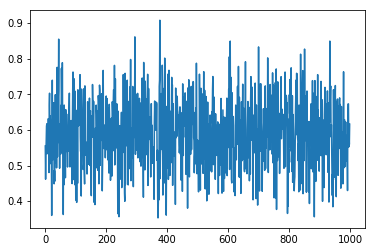

In [92]:
%%time
sim_graph(bp=[.25, .75])

1.01379173392 0.62095
CPU times: user 2.9 s, sys: 15.5 ms, total: 2.92 s
Wall time: 2.92 s


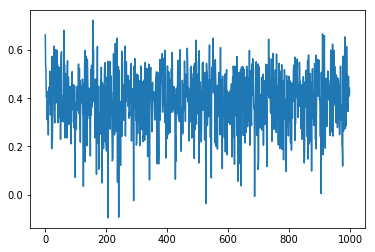

In [93]:
%%time
sim_graph(bp=[.25, 3])

/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


1.00443478332 0.9952


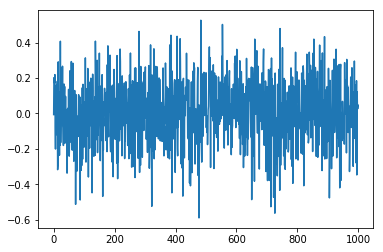

In [71]:
sim_graph(bp=[.25, 20])

1.01272670305 1.0138
CPU times: user 3.02 s, sys: 16.7 ms, total: 3.04 s
Wall time: 3.05 s


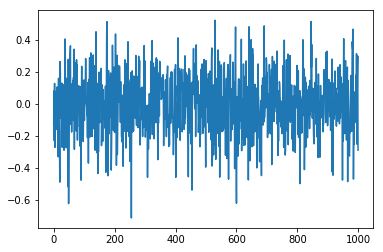

In [72]:
%%time
sim_graph(bp=[.25, 10])

/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/Users/Ben/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


1.00780609357 0.9858
CPU times: user 4.84 s, sys: 28.5 ms, total: 4.87 s
Wall time: 4.89 s


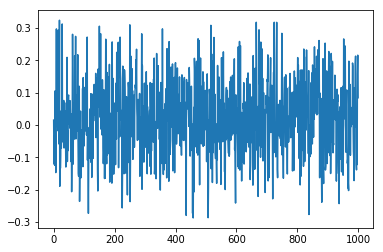

In [86]:
%%time
sim_graph(bp=[.5, 10, 20, 30])